In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Project : LOAN PREDICTION

# 1.Data Analysis

In [2]:
import pandas as pd
#df=pd.read_csv(r"/kaggle/input/loan-status-prediction/loan_data.csv")
df=pd.read_csv("./loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
df.isna().sum()  # get the count of null column wise

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.dropna(inplace=True)  #remove null values

In [6]:
df.duplicated().sum() #check if any dublicate

0

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#plot a histogram of "AppplicantIncome" to get general over about the income
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

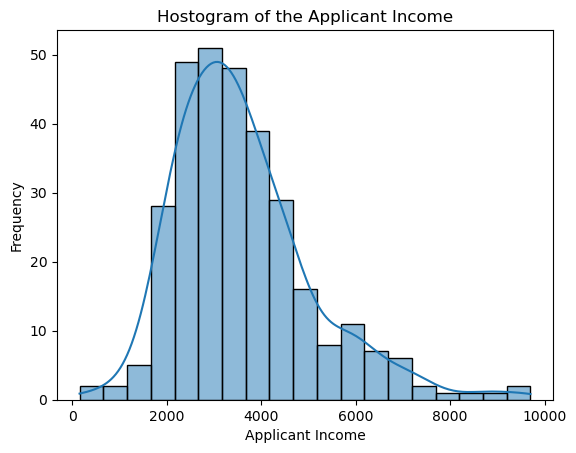

In [9]:
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Hostogram of the Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

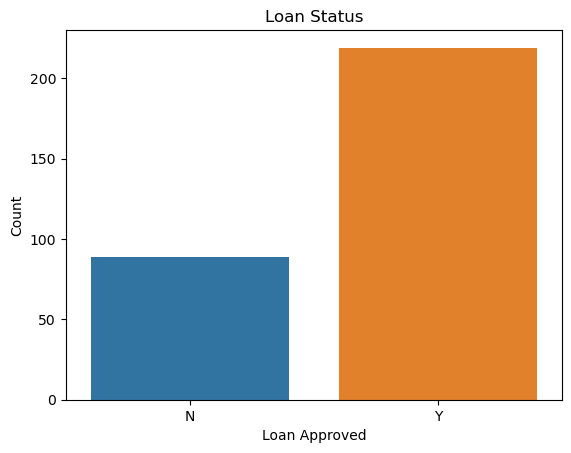

In [10]:
#create a count pllot of the loan status
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

In [11]:
#Average loan amount by educatin (use Group by)
avg_loan_amount_by_education=df.groupby("Education")["LoanAmount"].mean().reset_index()
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


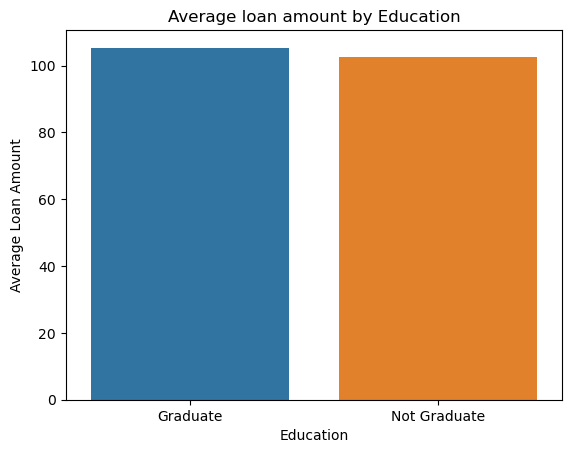

In [12]:
#create a barplot
sns.barplot(x='Education',y='LoanAmount',data=avg_loan_amount_by_education)
plt.title("Average loan amount by Education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()

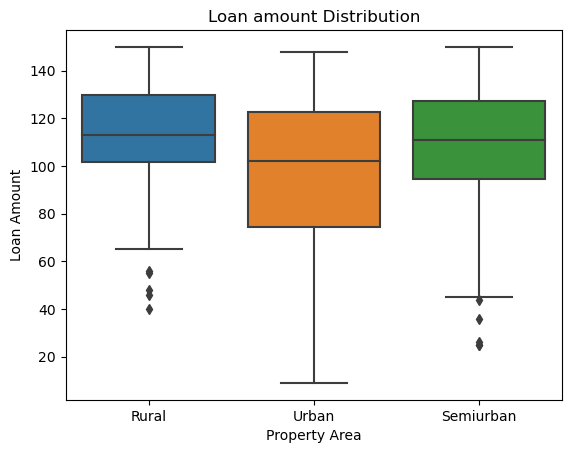

In [13]:
#Create a boxplot of loan amoount by property area
sns.boxplot(x='Property_Area',y='LoanAmount',data=df)
plt.title("Loan amount Distribution")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

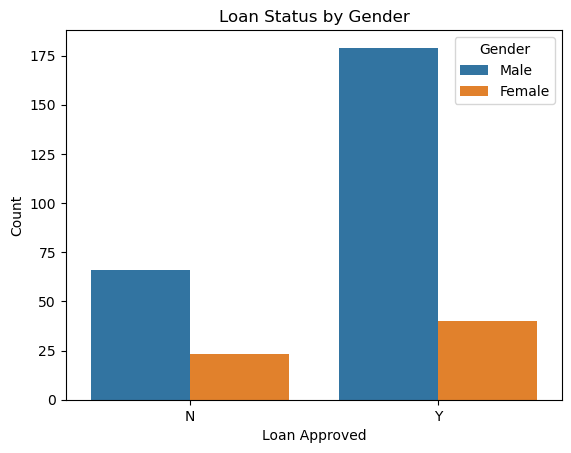

In [14]:
#Create a countplot of loan status by gender
sns.countplot(x='Loan_Status',hue='Gender',data=df)
plt.title("Loan Status by Gender")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, '')

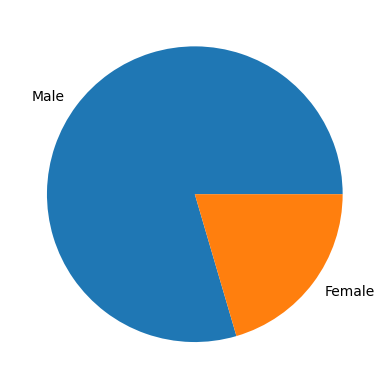

In [15]:
df['Gender'].value_counts().plot(kind='pie')
plt.ylabel("")

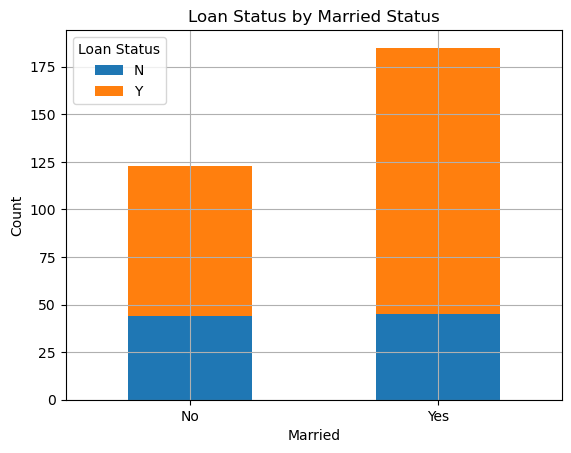

In [16]:
#Create a count of loan status by married status
loan_status_by_married=df.groupby("Married")['Loan_Status'].value_counts().unstack()
loan_status_by_married.plot(kind='bar',stacked=True)
plt.title("Loan Status by Married Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.xticks(rotation=0)
plt.grid()
plt.show()

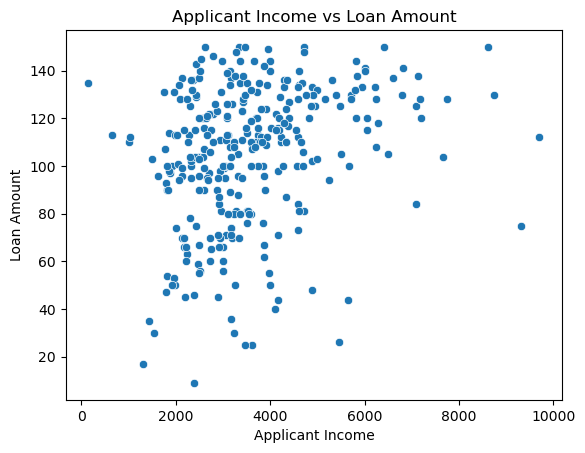

In [17]:
#Create a Scatter plot of Applicant income vs Loan Amount
sns.scatterplot(x='ApplicantIncome',y='LoanAmount', data=df)
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [18]:
#Create a Heatmap to visalize the coralation between the numeric columns
numeric_df=df.select_dtypes(include=['int64','float64'])
numeric_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [19]:
correlation_matrix=numeric_df.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


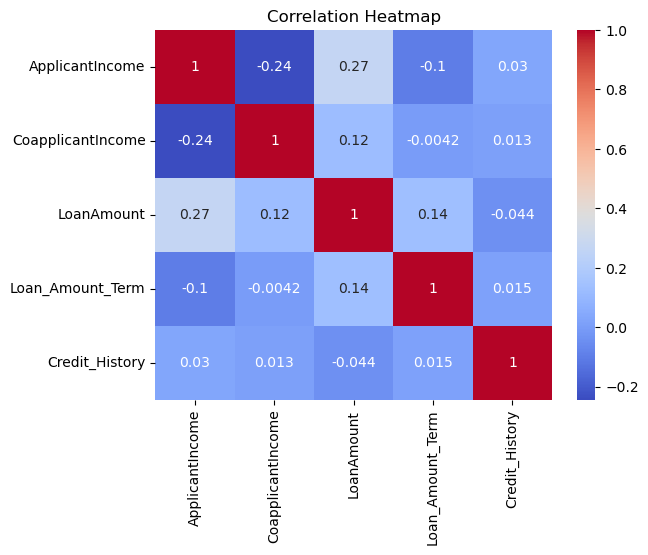

In [20]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
#Create a bar plot of Avergae loan term by self employed
avg_loan_term_by_employed=df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()
avg_loan_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


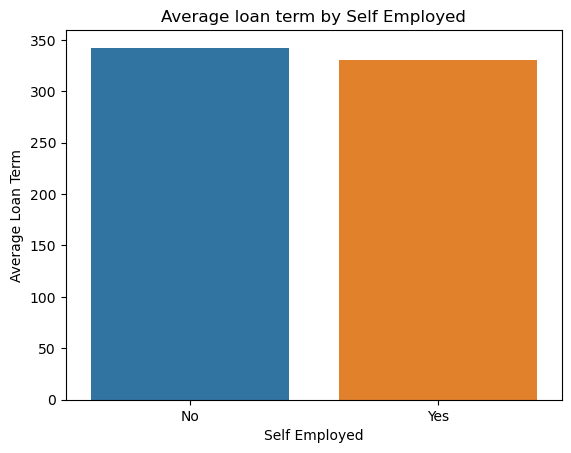

In [22]:
sns.barplot(x='Self_Employed',y='Loan_Amount_Term',data=avg_loan_term_by_employed)
plt.title("Average loan term by Self Employed")
plt.xlabel("Self Employed")
plt.ylabel("Average Loan Term")
plt.show()
#we can see that the average loan term is more for non self employed ones

# 2.Feature Engineering (Modelling)

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [24]:
X=df[["Married","ApplicantIncome","Education","LoanAmount","Credit_History"]]
Y=df[["Loan_Status"]]
Y

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
...,...
376,Y
377,Y
378,Y
379,Y


In [25]:
# import prep procesing and use label encoder to change this text features to numeric ones
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()

In [26]:
Y['Loan_Status']=labelencoder.fit_transform(Y["Loan_Status"])
Y

C:\Users\satvi\AppData\Local\Temp\ipykernel_13820\1332468423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Loan_Status']=labelencoder.fit_transform(Y["Loan_Status"])


,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [27]:
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [28]:
#Change the label for X
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128.0,1.0
377,Yes,3232,Graduate,108.0,1.0
378,No,2900,Graduate,71.0,1.0
379,Yes,4106,Graduate,40.0,1.0


In [29]:
X["Married"]=labelencoder.fit_transform(X["Married"])
X["Education"]=labelencoder.fit_transform(X["Education"])
X
#example entry for X: 0 3500 1 100 1

C:\Users\satvi\AppData\Local\Temp\ipykernel_13820\671774693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"]=labelencoder.fit_transform(X["Married"])
C:\Users\satvi\AppData\Local\Temp\ipykernel_13820\671774693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"]=labelencoder.fit_transform(X["Education"])


,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
1,1,3000,0,66.0,1.0
2,1,2583,1,120.0,1.0
3,0,6000,0,141.0,1.0
4,1,2333,1,95.0,1.0
...,...,...,...,...,...
376,1,5703,0,128.0,1.0
377,1,3232,0,108.0,1.0
378,0,2900,0,71.0,1.0
379,1,4106,0,40.0,1.0


In [30]:
#scaling the model : as we don't want the "AplicantIncone"ield to dominate the model result
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X=scaler.fit_transform(X)
X

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]])

In [32]:
#Export the scaler since we are going to use that in our FAST API
import joblib
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']

# 3. Training ML Models

In [33]:
#Split the data for training and testing
#"test_size" is the percentage of data that are going to be in he test  set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2) #20% data in test set

In [34]:
#Defining a function for getting model result (so we dont need to write again and again)
from sklearn.metrics import accuracy_score

def model_performance(predictions):
    print("Accuracy score of the model is {}".format(accuracy_score(y_test,predictions)))

**LOGISTIC REGRESSION**

In [35]:
#now we can start model prdiction
#first we are going to import grid search which will help us inn p[arameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression #logistic regression do not require gridsearch

In [36]:
#Logistic regression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train) #training model   (can also use y_train.values.ravel())
logistic_predictions=logistic_model.predict(x_test) #model predict

c:\Users\satvi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#accuracy of the model
model_performance(logistic_predictions)

Accuracy score of the model is 0.8870967741935484


**K NEIGHBOURS CLASSIFIER**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
#define a dictionary with possible parameters
param_grid={"n_neighbors": [3,5,6,7,8,9], "weights" :["uniform", "distance"]}
#k neioghbours with grid serach cross validaton
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid)
gridkn.fit(x_train,y_train) # or ,y_train.values.ravel() to remove errors

c:\Users\satvi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\satvi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\satvi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\satvi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

PARAMETER TUNING

In [39]:
gridkn.best_params_   

{'n_neighbors': 7, 'weights': 'uniform'}

In [40]:
#prediction
knpreds=gridkn.predict(x_test)
model_performance(knpreds)

Accuracy score of the model is 0.8709677419354839


**SUPPORT VECTOR CLASSIFIER**

In [41]:
from sklearn.svm import SVC
svm=SVC()
param_grid_svc={"C":[0.001,0.01,0.02,0.03,0.04,0.05,0.10,5],"kernel":["linear", "rbf", "ploy"]}

gridsvc=GridSearchCV(svm,param_grid_svc)

#train model
gridsvc.fit(x_train,y_train.values.ravel()) 

c:\Users\satvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\satvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\satvi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\satvi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\satvi\anaconda3\Lib\site-packages

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 5],
                         'kernel': ['linear', 'rbf', 'ploy']})

In [42]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [43]:
#prediction
pred_svc=gridsvc.predict(x_test)

model_performance(pred_svc)

Accuracy score of the model is 0.8870967741935484


In [44]:
#export model using joblib
joblib.dump(gridsvc,"model.pkl")

['model.pkl']

In [45]:
#below is what we are going to to ion the API
'''
import joblib
testmodel=joblib.load("model.pkl")
testmodel.predict([0,3500,1,100,1])
'''

'\nimport joblib\ntestmodel=joblib.load("model.pkl")\ntestmodel.predict([0,3500,1,100,1])\n'

# 4. FAST API APP CREATION

In [1]:
'''from fastapi import FastAPI
from pydantic import BaseModel #for defining the data types
import joblib
import numpy as np
import uvicorn 

class InputData(BaseModel):
    x1:float
    x2:float
    x3:float
    x4:float
    x5:float

#Load the model
scaler=joblib.load("Scaler.pkl")
model=joblib.load("model.pkl")
        
app=FastAPI()       

#define the endpoint 'predict' for API which is going to return prediction for our model
@app.post("/predict/") 
def predict(input_data : InputData):
    x_values=np.array([[
        inputdata.x1,
        inputdata.x2,
        inputdata.x3,
        inputdata.x4,
        inputdata.x5
    ]])
    #inside the function we are going to scale our x values
    scaled_x_values=scaler.transform(x_values)
    prediction=model.predict(scaled_x_values)
    predict=int(prediction[0])
    return {"prediction": predict}


if __name__ =="__main__":
    uvicorn.run(app,host="127.0.0.1",port=8000)
'''


'from fastapi import FastAPI\nfrom pydantic import BaseModel #for defining the data types\nimport joblib\nimport numpy as np\nimport uvicorn \n\nclass InputData(BaseModel):\n    x1:float\n    x2:float\n    x3:float\n    x4:float\n    x5:float\n\n#Load the model\nscaler=joblib.load("Scaler.pkl")\nmodel=joblib.load("model.pkl")\n        \napp=FastAPI()       \n\n#define the endpoint \'predict\' for API which is going to return prediction for our model\n@app.post("/predict/") \ndef predict(input_data : InputData):\n    x_values=np.array([[\n        inputdata.x1,\n        inputdata.x2,\n        inputdata.x3,\n        inputdata.x4,\n        inputdata.x5\n    ]])\n    #inside the function we are going to scale our x values\n    scaled_x_values=scaler.transform(x_values)\n    prediction=model.predict(scaled_x_values)\n    predict=int(prediction[0])\n    return {"prediction": predict}\n\n\nif __name__ =="__main__":\n    uvicorn.run(app,host="127.0.0.1",port=8000)\n'

**Next Steps**

1.In the terminal execute the program 

2.Open another terminal type : uvicorn app:app --reload

3.Click on the address (https://127.0.0......) and insert /docs after the port (Eg:https://address:port/docs)

4.In the endpoint ,test the model by giving the input data.

    Input data format
    
    Married         : Binary (0=NOT MARRIED , 1=MARRIED) 
    ApplicantIncome	: Number (float)
    Education       : Binary (0=NOT GRADUATE , 1=GRADUATE) 
    LoanAmount      : Number (float)                        (Loan amount inthousands)
    Credit_History  : Binary (0=NO , 1=YES)                 (i.e.,credit history meets guidelinenes or not)

    Output : Binary  (0=NOT APPROVED , 1=APPROVED) 